<a href="https://colab.research.google.com/github/ChristianVieriSinulingga/ANFIS-Vieri/blob/main/anfis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Clone dataset
!git clone https://github.com/fractalliter/stock-market-index-perdiction

fatal: destination path 'stock-market-index-perdiction' already exists and is not an empty directory.


In [16]:
# Clone dataset
!git clone https://github.com/ChristianVieriSinulingga/ANFIS-Vieri

fatal: destination path 'ANFIS-Vieri' already exists and is not an empty directory.


In [19]:
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from anfis1 import ANFIS


# # Generate dataset
D = 4  # number of regressors
ts = np.loadtxt("Data-V2.csv", delimiter=",", skiprows=1,)
data = ts[:, 0:4]
lbls = ts[:, 0]

trnData = data
trnLbls = lbls
chkData = data[lbls.size - round(lbls.size * 0.15):, :]
chkLbls = lbls[lbls.size - round(lbls.size * 0.15):]

# ANFIS params and Tensorflow graph initialization
m = 4  # number of rules
alpha = 0.02  # learning rate

fis = ANFIS(n_inputs=D, n_rules=m, learning_rate=alpha)

# Training
num_epochs = 20000
print(len(trnData), len(trnLbls), len(chkData), len(chkLbls))
# Initialize session to make computations on the Tensorflow graph
with tf.Session() as sess:
    # Initialize model parameters
    sess.run(fis.init_variables)
    trn_costs = []
    val_costs = []
    time_start = time.time()
    for epoch in range(num_epochs):
        #  Run an update step
        trn_loss, trn_pred = fis.train(sess, trnData, trnLbls)
        # Evaluate on validation set
        val_pred, val_loss = fis.infer(sess, chkData, chkLbls)
        if epoch % 10 == 0:
            print("Train cost after epoch %i: %f" % (epoch, trn_loss))
        if epoch == num_epochs - 1:
            time_end = time.time()
            print("Elapsed time: %f" % (time_end - time_start))
            print("Validation loss: %f" % val_loss)
            # Plot real vs. predicted
            pred = np.vstack((np.expand_dims(trn_pred, 1),
                              np.expand_dims(val_pred, 1)))
            plt.figure("ANFIS Prediction")
            # plt.plot(ts)
            # plt.plot(pred)
            plt.plot(range(len(pred)),
                     pred, 'r', label='trained')
            plt.plot(range(len(lbls)), lbls, 'b', label='original')
            plt.legend(loc='upper left')
        trn_costs.append(trn_loss)
        val_costs.append(val_loss)
    # Plot the cost over epochs
    plt.figure(2)
    plt.subplot(2, 1, 1)
    plt.plot(np.squeeze(trn_costs))
    plt.title("Training loss, Learning rate =" + str(alpha))
    plt.subplot(2, 1, 2)
    plt.plot(np.squeeze(val_costs))
    plt.title("Validation loss, Learning rate =" + str(alpha))
    plt.ylabel('RMSE')
    plt.xlabel('Epochs')
    # Plot resulting membership functions
    fis.plotmfs(sess)
    plt.show()

ModuleNotFoundError: No module named 'anfis1'

In [ ]:
ts = numpy.loadtxt("beasiswa.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

current error:  0.07391912244673388
current error:  0.07411221328521642
current error:  0.07429984207863703
current error:  0.0744816868491186
current error:  0.0746574266451628
current error:  0.07482673622865978
current error:  0.07498928034048638
current error:  0.0751447075690014
current error:  0.07529264386728655
current error:  0.07543268579666738
current error:  0.07556439361579972
current error:  0.07568728438763593
current error:  0.07580082534343092
current error:  0.07590442782160506
current error:  0.0759974421855996
current error:  0.07607915421533347
current error:  0.07614878354426617
current error:  0.07620548476380866
current error:  0.0762483518109786
0.016728
-0.048074
1.012498


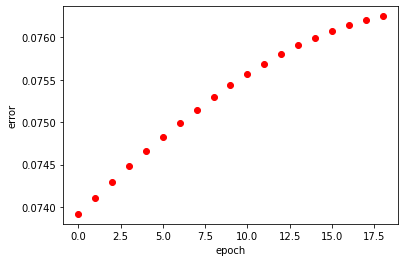

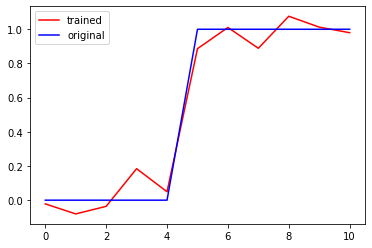

In [ ]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]


mfc = membership.membershipfunction.MemFuncs(mf)
anf = anfis.ANFIS(X, Y, mfc)
anf.trainHybridJangOffLine(epochs=20)

print (round(anf.consequents[-1][0],6))
print (round(anf.consequents[-2][0],6))
print (round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
    print ('test is good')


anf.plotErrors()
anf.plotResults()

In [ ]:
X = numpy.asarray([[3.2,3.4]])
X

array([[3.2, 3.4]])

In [ ]:
import anfis
numpy.round(anfis.predict(anf,X))

array([[1.]])